# Classification - Patent or Utility Model?

We attempt to classify applications depending on their IPC class information. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_csv('data/patents_timeline_cleaned.csv')
df2 = pd.read_csv('data/ums_timeline_cleaned.csv')
df3 = pd.read_csv('data/feature_engineering.csv', usecols=['Original Filing Number','A','B','C','D','E','F','G','H'])

In [2]:
df = pd.concat([df1,df2], ignore_index=True, sort=False)
df.head()

,Original Filing Number,Title,Application Subtype,Applicant,Filing Date,Publication Date,Registration Date,Status,Number of Unique IPC Classes,Number of Unique Main Categories,Number of Unique Sub Categories 1,Number of Unique Sub Categories 2,Expiration Date,Days_FD_PD,Days_PD_RD,Days_ED_RD,Days_FD_RD
0,A/1/1993/046127,PRESS-ON CLOSURE WITH PEELABLE END PANEL,Invention,"SAUER, DONALD G.\nFRASER, ROBERT W.\nROTH, DON...",1993-04-29,NaN,2002-12-17,Expired,3,1,1,1,2013-04-29,NaN,NaN,3786.0,3519.0
1,A/1/1993/046622,"IMIDAZOLE, TRIAZOLE AND TETRAZOLE DERIVATIVES",Invention,"MATASSA, VICTOR G.\nBAKER, RAYMOND\nSTREET, LE...",1993-07-30,NaN,2004-03-15,Registered,30,2,2,3,2013-07-30,NaN,NaN,3424.0,3881.0
2,A/1/1993/047573,PREFILLED SYRINGE,Invention,"TAKEDA CHEMICAL INDUSTRIES, LTD.",1993-04-19,NaN,2003-03-11,Expired,1,1,1,1,2013-04-19,NaN,NaN,3692.0,3613.0
3,A/1/1994/049461,RECORDING MEDIUM MANAGEMENT METHOD WHERE RECOR...,Invention,KATSUYUKI TERANISHI\nTATSUYA IGARASHI,1994-11-28,NaN,2003-09-10,Registered,5,1,2,2,2014-11-28,NaN,NaN,4097.0,3208.0
4,A/1/1994/049647,HERBICIDAL COMPOSITIONS COMPRISING GLYPHOSATE ...,Invention,"KASSEBAUM, JAMES WEB\nBERK, HOWARD CARY",1994-12-22,NaN,1999-11-12,Inactive,6,1,1,1,2014-12-22,NaN,NaN,5519.0,1786.0


In [3]:
df = pd.merge(df,df3,on='Original Filing Number')

In [4]:
df = df[['A','B','C','D','E','F','G','H','Number of Unique IPC Classes','Number of Unique Main Categories','Number of Unique Sub Categories 1','Number of Unique Sub Categories 2','Application Subtype','Days_FD_RD']]
df = df.dropna()

In [5]:
df['Application Subtype'] = df['Application Subtype'].map({'Invention':0, 'Utility model':1})

In [6]:
df['Application Subtype'].value_counts()

0    34647
1    16814
Name: Application Subtype, dtype: int64

## Using Types and Counts of IPC Classes Only

In [7]:
features = df[df.columns[0:12]].to_numpy()
labels =  df[df.columns[12]].to_numpy()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

C:\Users\rcalindayu\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\rcalindayu\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\rcalindayu\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\rcalindayu\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\rcalindayu\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 

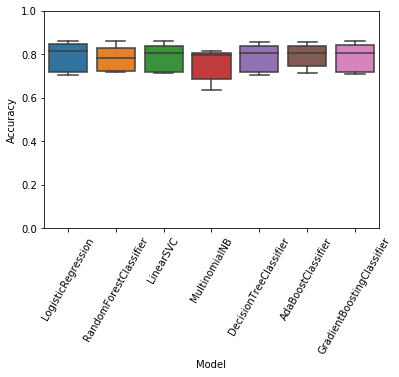

In [9]:
models = [
    LogisticRegression(random_state=0),
    RandomForestClassifier(n_estimators=100, max_depth=2, random_state=11),
    LinearSVC(),
    MultinomialNB(),
    DecisionTreeClassifier(),
    AdaBoostClassifier(n_estimators=20),
    GradientBoostingClassifier(n_estimators=20)
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
g = sns.boxplot(x='model_name', y='accuracy', data=cv_df)

g.set_xticklabels(g.get_xticklabels(),rotation=60)
#sns.stripplot(x='model_name', y='accuracy', data=cv_df, size=5, linewidth=1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()

In [10]:
cv_df.groupby('model_name').accuracy.mean()

model_name
AdaBoostClassifier            0.792795
DecisionTreeClassifier        0.784926
GradientBoostingClassifier    0.788365
LinearSVC                     0.786908
LogisticRegression            0.790522
MultinomialNB                 0.748432
RandomForestClassifier        0.783235
Name: accuracy, dtype: float64

## Focus on AdaBoost Classifier

We focus on optimizing the AdaBoost classifier to predict if an application is a patent or a utility model.

In [11]:
model = AdaBoostClassifier(n_estimators=20)
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

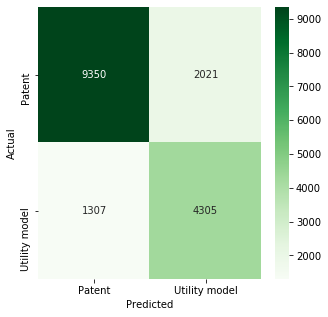

In [12]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, cmap="Greens", annot=True, fmt='d', xticklabels={'Patent':0,'Utility model':1}, yticklabels={'Patent':0,'Utility model':1})
plt.ylabel('Actual')
plt.xlabel('Predicted')
#ax.set_ylim()
plt.show()

Text(0.5, 0, 'False Positive Rate')

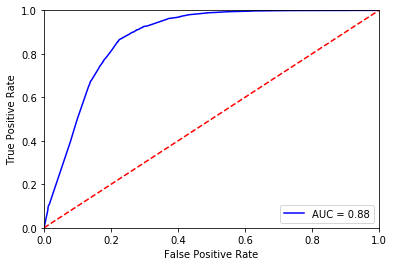

In [13]:
from sklearn.metrics import roc_curve, auc

model = AdaBoostClassifier()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)

#You can get probability estimates using the predict_proba() method of the KNeighborsClassifier in sklearn.
#This returns a numpy array with two columns for a binary classification, one each for the negative and positive class.
y_scores = model.predict_proba(X_test)

#For the roc_curve() function you want to use probability estimates of the positive class
#thresholds are automatically 
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots()
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


## Grid Search

Codes taken from Eskwelabs AdaBoost lecture.

In [14]:
Features = df[df.columns[0:12]].to_numpy()
Labels = df[df.columns[12]].to_numpy()

In [15]:
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as nr
from sklearn.ensemble import AdaBoostClassifier
from sklearn import preprocessing

In [16]:
nr.seed(123)
inside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits=10, shuffle = True)

In [17]:
## Define the dictionary for the grid search and the model object to search on
param_grid = {"learning_rate": [0.1, 1, 10]}
## Define the AdaBoosted tree model
nr.seed(3456)
ab_clf = AdaBoostClassifier()  

## Perform the grid search over the parameters
nr.seed(4455)
ab_clf = ms.GridSearchCV(estimator = ab_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
ab_clf.fit(Features, Labels)
print(ab_clf.best_estimator_.learning_rate)

1


In [18]:
nr.seed(498)
cv_estimate = ms.cross_val_score(ab_clf, Features, Labels, 
                                 cv = outside) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.875
SDT of the metric       = 0.003
Outcomes by cv fold
Fold  1    0.870
Fold  2    0.876
Fold  3    0.875
Fold  4    0.877
Fold  5    0.876
Fold  6    0.875
Fold  7    0.871
Fold  8    0.878
Fold  9    0.873
Fold 10    0.877


In [19]:
## Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 300)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [20]:
nr.seed(1115)
ab_mod = AdaBoostClassifier(learning_rate = ab_clf.best_estimator_.learning_rate) 
ab_mod.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1)

In [21]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = ab_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive       151                34
Actual negative        24                91

Accuracy        0.81
AUC             0.88
Macro precision 0.80
Macro recall    0.80
 
           Positive      Negative
Num case      185           115
Precision    0.86          0.73
Recall       0.82          0.79
F1           0.84          0.76


Text(0, 0.5, 'Feature importance')

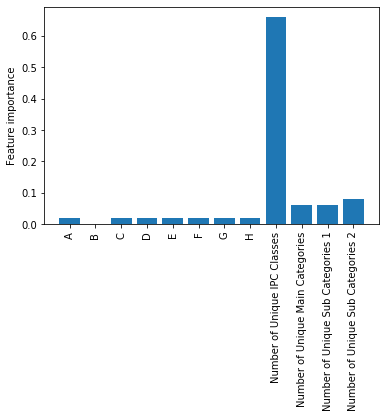

In [22]:
importance = ab_mod.feature_importances_
plt.bar(range(12), importance, tick_label = ['A','B','C','D','E','F','G','H','Number of Unique IPC Classes','Number of Unique Main Categories','Number of Unique Sub Categories 1','Number of Unique Sub Categories 2'])
plt.xticks(rotation=90)
plt.ylabel('Feature importance')

## Patent and Utility Model Filings per Category

We build a bar graph for filings according to type and category

In [23]:
cats = ['A','B','C','D','E','F','G','H']
pt_count = []
um_count = []
for cat in cats:
    pt_count.append(df[(df[cat]==1) & (df['Application Subtype']==0)][cat].sum())
    um_count.append(df[(df[cat]==1) & (df['Application Subtype']==1)][cat].sum())
    
pt_count


[6142, 16947, 18139, 2529, 1013, 2869, 1266, 2252]

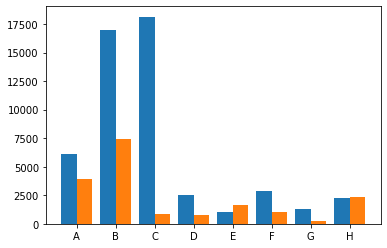

In [24]:
_X = np.arange(len(cats))

plt.bar(_X - 0.2, pt_count, 0.4)
plt.bar(_X + 0.2, um_count, 0.4)
plt.xticks(_X, cats) # set labels manually
plt.show()

## Removing the categorical information from features

We check if removing the categorical information would make a model with higher accuracy.

In [25]:
Features = df[df.columns[8:12]].to_numpy()
Labels = df[df.columns[12]].to_numpy()

In [26]:
nr.seed(123)
inside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits=10, shuffle = True)

In [27]:
## Define the dictionary for the grid search and the model object to search on
param_grid = {"learning_rate": [0.1, 1, 10]}
## Define the AdaBoosted tree model
nr.seed(3456)
ab_clf = AdaBoostClassifier()  

## Perform the grid search over the parameters
nr.seed(4455)
ab_clf = ms.GridSearchCV(estimator = ab_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
ab_clf.fit(Features, Labels)
print(ab_clf.best_estimator_.learning_rate)

1


In [28]:
nr.seed(498)
cv_estimate = ms.cross_val_score(ab_clf, Features, Labels, 
                                 cv = outside) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.827
SDT of the metric       = 0.004
Outcomes by cv fold
Fold  1    0.829
Fold  2    0.826
Fold  3    0.823
Fold  4    0.831
Fold  5    0.833
Fold  6    0.830
Fold  7    0.820
Fold  8    0.833
Fold  9    0.822
Fold 10    0.827


In [29]:
## Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 300)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [30]:
nr.seed(1115)
ab_mod = AdaBoostClassifier(learning_rate = ab_clf.best_estimator_.learning_rate) 
ab_mod.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1)

In [31]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = ab_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive       142                43
Actual negative        29                86

Accuracy        0.76
AUC             0.83
Macro precision 0.75
Macro recall    0.76
 
           Positive      Negative
Num case      185           115
Precision    0.83          0.67
Recall       0.77          0.75
F1           0.80          0.70


## Checking for imbalance

There are more patents than utility models filed which may skew the data, so we try to balance the two data sets to hopefully get a more accurate model.>

In [32]:
temp_Labels_1 = Labels[Labels == 1]  # Save these
temp_Features_1 = Features[Labels == 1,:] # Save these
temp_Labels_0 = Labels[Labels == 0]  # Undersample these
temp_Features_0 = Features[Labels == 0,:] # Undersample these

indx = nr.choice(temp_Features_0.shape[0], temp_Features_1.shape[0], replace=True)

temp_Features = np.concatenate((temp_Features_1, temp_Features_0[indx,:]), axis = 0)
temp_Labels = np.concatenate((temp_Labels_1, temp_Labels_0[indx,]), axis = 0) 

print(np.bincount(temp_Labels))
print(temp_Features.shape)
print(temp_Labels.shape)

[16814 16814]
(33628, 4)
(33628,)


In [33]:
nr.seed(1234)
inside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(3214)
outside = ms.KFold(n_splits=10, shuffle = True)

## Define the AdaBoosted tree model
nr.seed(3456)
ab_clf = AdaBoostClassifier()  

## Perform the grid search over the parameters
nr.seed(4455)
ab_clf = ms.GridSearchCV(estimator = ab_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
ab_clf.fit(temp_Features, temp_Labels)
print(ab_clf.best_estimator_.learning_rate)

1


In [34]:
nr.seed(498)
cv_estimate = ms.cross_val_score(ab_clf, Features, Labels, 
                                 cv = outside) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.827
SDT of the metric       = 0.004
Outcomes by cv fold
Fold  1    0.829
Fold  2    0.826
Fold  3    0.823
Fold  4    0.831
Fold  5    0.833
Fold  6    0.830
Fold  7    0.820
Fold  8    0.833
Fold  9    0.822
Fold 10    0.827


In [35]:
## Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 300)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

## Undersample the majority case for the training data
temp_Labels_1 = y_train[y_train == 1]  # Save these
temp_Features_1 = X_train[y_train == 1,:] # Save these
temp_Labels_0 = y_train[y_train == 0]  # Undersample these
temp_Features_0 = X_train[y_train == 0,:] # Undersample these

indx = nr.choice(temp_Features_0.shape[0], temp_Features_1.shape[0], replace=True)

X_train = np.concatenate((temp_Features_1, temp_Features_0[indx,:]), axis = 0)
y_train = np.concatenate((temp_Labels_1, temp_Labels_0[indx,]), axis = 0) 

print(np.bincount(y_train))
print(X_train.shape)
print(y_train.shape)

[16699 16699]
(33398, 4)
(33398,)


In [36]:
## Define and fit the model
nr.seed(1115)
ab_mod = AdaBoostClassifier(learning_rate = ab_clf.best_estimator_.learning_rate) 
ab_mod.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1)

In [37]:
probabilities = ab_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive       130                55
Actual negative         9               106

Accuracy        0.79
AUC             0.83
Macro precision 0.80
Macro recall    0.81
 
           Positive      Negative
Num case      185           115
Precision    0.94          0.66
Recall       0.70          0.92
F1           0.80          0.77
